# Basic data analysis with Pandas 

Today we will learn how to:
- load a single cell RNA-seq expression dataset
- access the data
- group the data
- compute summary statistics

We will use a real scRNA-seq dataset from Tirosh et al, Science, 2016. 

Please first download the dataset from [this link](https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE72056&format=file&file=GSE72056%5Fmelanoma%5Fsingle%5Fcell%5Frevised%5Fv2%2Etxt%2Egz).

In [1]:
import sys,os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
sns.set_style('white')

In [2]:
if not os.path.isdir('Figures'):
    os.mkdir("Figures")

# Loading Data
Pandas can load data from multiple sources:
- Delimited files ("TSV", "CSV", etc)
- Excel files
- JSON
- HTML
- and everything else listed [here](http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)...

Delimited file format is highly common, and the example dataset we will use has this format. The others are similar.

In [3]:
file_loc = "/Users/murat/Data/tirosh/GSE72056_melanoma_single_cell_revised_v2.txt.gz"
sc_data = pd.read_csv(file_loc, "\t", index_col=0)

In [4]:
sc_data

,Cy72_CD45_H02_S758_comb,CY58_1_CD45_B02_S974_comb,Cy71_CD45_D08_S524_comb,Cy81_FNA_CD45_B01_S301_comb,Cy80_II_CD45_B07_S883_comb,Cy81_Bulk_CD45_B10_S118_comb,Cy72_CD45_D09_S717_comb,Cy74_CD45_A03_S387_comb,Cy71_CD45_B05_S497_comb,Cy80_II_CD45_C09_S897_comb,...,CY75_1_CD45_CD8_7__S265_comb,CY75_1_CD45_CD8_3__S127_comb,CY75_1_CD45_CD8_1__S61_comb,CY75_1_CD45_CD8_1__S12_comb,CY75_1_CD45_CD8_1__S25_comb,CY75_1_CD45_CD8_7__S223_comb,CY75_1_CD45_CD8_1__S65_comb,CY75_1_CD45_CD8_1__S93_comb,CY75_1_CD45_CD8_1__S76_comb,CY75_1_CD45_CD8_7__S274_comb
Cell,,,,,,,,,,,,,,,,,,,,,
tumor,72.00000,58.00000,71.00000,81.00000,80.00000,81.00000,72.00000,74.00000,71.00000,80.00000,...,75.00000,75.000000,75.000000,75.000000,75.000000,75.00000,75.00000,75.00000,75.000000,75.00000
"malignant(1=no,2=yes,0=unresolved)",1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,1.00000
"non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)",2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,0.00000
C9orf152,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000
RPS11,9.21720,8.37450,9.31300,7.88760,8.32910,7.83360,8.37370,8.13380,8.43730,7.59680,...,0.00000,7.863900,5.850500,0.626390,6.273400,5.48890,4.92620,7.09580,3.997000,3.98970
ELMO2,0.00000,0.00000,2.12630,0.00000,0.00000,0.77400,0.00000,0.00000,0.00000,0.38294,...,0.00000,0.000000,3.157200,4.793200,0.000000,0.00000,5.52960,0.00000,0.000000,0.00000
CREB3L1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000
PNMA1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.51420,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000
MMP2,0.00000,0.00000,0.73812,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.86970,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000


Multiple types of data interspersed together.

Let's separate them.

# Accessing the DataFrame
Two main methods to access elements:
- indices
- numbers

In [5]:
sc_data

,Cy72_CD45_H02_S758_comb,CY58_1_CD45_B02_S974_comb,Cy71_CD45_D08_S524_comb,Cy81_FNA_CD45_B01_S301_comb,Cy80_II_CD45_B07_S883_comb,Cy81_Bulk_CD45_B10_S118_comb,Cy72_CD45_D09_S717_comb,Cy74_CD45_A03_S387_comb,Cy71_CD45_B05_S497_comb,Cy80_II_CD45_C09_S897_comb,...,CY75_1_CD45_CD8_7__S265_comb,CY75_1_CD45_CD8_3__S127_comb,CY75_1_CD45_CD8_1__S61_comb,CY75_1_CD45_CD8_1__S12_comb,CY75_1_CD45_CD8_1__S25_comb,CY75_1_CD45_CD8_7__S223_comb,CY75_1_CD45_CD8_1__S65_comb,CY75_1_CD45_CD8_1__S93_comb,CY75_1_CD45_CD8_1__S76_comb,CY75_1_CD45_CD8_7__S274_comb
Cell,,,,,,,,,,,,,,,,,,,,,
tumor,72.00000,58.00000,71.00000,81.00000,80.00000,81.00000,72.00000,74.00000,71.00000,80.00000,...,75.00000,75.000000,75.000000,75.000000,75.000000,75.00000,75.00000,75.00000,75.000000,75.00000
"malignant(1=no,2=yes,0=unresolved)",1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,1.00000
"non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)",2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,0.00000
C9orf152,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000
RPS11,9.21720,8.37450,9.31300,7.88760,8.32910,7.83360,8.37370,8.13380,8.43730,7.59680,...,0.00000,7.863900,5.850500,0.626390,6.273400,5.48890,4.92620,7.09580,3.997000,3.98970
ELMO2,0.00000,0.00000,2.12630,0.00000,0.00000,0.77400,0.00000,0.00000,0.00000,0.38294,...,0.00000,0.000000,3.157200,4.793200,0.000000,0.00000,5.52960,0.00000,0.000000,0.00000
CREB3L1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000
PNMA1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.51420,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000
MMP2,0.00000,0.00000,0.73812,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.86970,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000


For example, 'RPS11' or 'ELMO2' are the indices, or 'names' of two rows while 'Cy72_CD45_H02_S758_comb' is the name of the first column. 

However, they are also the fifth and sixth rows or the first column, respectively. 

Let's select the 'RPS11' row:

In [6]:
rps11 = sc_data.loc['RPS11']
rps11

Cy72_CD45_H02_S758_comb         9.21720
CY58_1_CD45_B02_S974_comb       8.37450
Cy71_CD45_D08_S524_comb         9.31300
Cy81_FNA_CD45_B01_S301_comb     7.88760
Cy80_II_CD45_B07_S883_comb      8.32910
Cy81_Bulk_CD45_B10_S118_comb    7.83360
Cy72_CD45_D09_S717_comb         8.37370
Cy74_CD45_A03_S387_comb         8.13380
Cy71_CD45_B05_S497_comb         8.43730
Cy80_II_CD45_C09_S897_comb      7.59680
Cy74_CD45_F09_S453_comb         8.68750
CY58_1_CD45_D03_S999_comb       8.93280
Cy72_CD45_C01_S697_comb         8.74090
Cy71_CD45_D07_S523_comb         7.48190
Cy81_FNA_CD45_C12_S228_comb     7.37830
Cy81_FNA_CD45_E05_S341_comb     8.13500
Cy74_CD45_D04_S424_comb         6.74030
Cy74_CD45_C11_S419_comb         8.85560
Cy81_Bulk_CD45_E10_S154_comb    7.60490
Cy80_II_CD45_H07_S955_comb      8.54360
CY58_1_CD45_F01_S1021_comb      9.50820
Cy81_FNA_CD45_D09_S333_comb     8.85780
Cy71_CD45_E12_S540_comb         8.25750
Cy81_FNA_CD45_D07_S235_comb     7.85580
Cy72_CD45_D07_S715_comb         7.44300


Now let's select the fifth row.

Keep in mind that Python is zero-indexed (i.e. the index of the first element is 0) thus, we need to pick the '4th' element.

In [7]:
fifth = sc_data.iloc[4,:]
fifth

Cy72_CD45_H02_S758_comb         9.21720
CY58_1_CD45_B02_S974_comb       8.37450
Cy71_CD45_D08_S524_comb         9.31300
Cy81_FNA_CD45_B01_S301_comb     7.88760
Cy80_II_CD45_B07_S883_comb      8.32910
Cy81_Bulk_CD45_B10_S118_comb    7.83360
Cy72_CD45_D09_S717_comb         8.37370
Cy74_CD45_A03_S387_comb         8.13380
Cy71_CD45_B05_S497_comb         8.43730
Cy80_II_CD45_C09_S897_comb      7.59680
Cy74_CD45_F09_S453_comb         8.68750
CY58_1_CD45_D03_S999_comb       8.93280
Cy72_CD45_C01_S697_comb         8.74090
Cy71_CD45_D07_S523_comb         7.48190
Cy81_FNA_CD45_C12_S228_comb     7.37830
Cy81_FNA_CD45_E05_S341_comb     8.13500
Cy74_CD45_D04_S424_comb         6.74030
Cy74_CD45_C11_S419_comb         8.85560
Cy81_Bulk_CD45_E10_S154_comb    7.60490
Cy80_II_CD45_H07_S955_comb      8.54360
CY58_1_CD45_F01_S1021_comb      9.50820
Cy81_FNA_CD45_D09_S333_comb     8.85780
Cy71_CD45_E12_S540_comb         8.25750
Cy81_FNA_CD45_D07_S235_comb     7.85580
Cy72_CD45_D07_S715_comb         7.44300


How can we compare these? 

Let's retrieve the values as an array and see if they are all equal to each other.

In [8]:
rps11.values

array([ 9.2172,  8.3745,  9.313 , ...,  7.0958,  3.997 ,  3.9897])

In [9]:
fifth.values

array([ 9.2172,  8.3745,  9.313 , ...,  7.0958,  3.997 ,  3.9897])

In [10]:
fifth.values == rps11.values

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

We get a lot of values boolean values...

In [11]:
len(fifth.values)

4645

4645 values in fact---one for each column (i.e. cell).

The first and last three look identical, but there are thousands of others. If just one of them is different, however, the equality check should fail. How can we check them all? 

In [12]:
np.all(fifth.values == rps11.values)

True

All the entries are identical.

What if the numbers were just so slightly off, but not enough that we'd mind.

Example: same data but with a different (less memory consuming) data structure

In [13]:
fifth_full = fifth.values
fifth_full

array([ 9.2172,  8.3745,  9.313 , ...,  7.0958,  3.997 ,  3.9897])

In [14]:
fifth_full.dtype

dtype('float64')

In [15]:
fifth_small = np.float16(fifth.values)
fifth_small

array([ 9.21875   ,  8.375     ,  9.3125    , ...,  7.09765625,
        3.99609375,  3.99023438], dtype=float16)

In [16]:
fifth_small.dtype

dtype('float16')

In [17]:
np.all(fifth_small == fifth_full)

False

In [18]:
np.any(fifth_small == fifth_full)

True

In [19]:
np.allclose(fifth_full, fifth_small, rtol=1e-3)

True

This is our way of checking if all values are close to each other.

'Close' is defined as within some fixed relative or absolute tolerance.

# Pandas Series
What if we wanted to sort the cells by their expression of a particular gene?

First we need to get the expression of that gene in every cell.

Let's do this for an example gene, CD4.

In [20]:
cd4 = sc_data.loc['CD4']
cd4

Cy72_CD45_H02_S758_comb         0.0000
CY58_1_CD45_B02_S974_comb       0.0000
Cy71_CD45_D08_S524_comb         0.0000
Cy81_FNA_CD45_B01_S301_comb     0.0000
Cy80_II_CD45_B07_S883_comb      0.0000
Cy81_Bulk_CD45_B10_S118_comb    0.0000
Cy72_CD45_D09_S717_comb         0.0000
Cy74_CD45_A03_S387_comb         0.0000
Cy71_CD45_B05_S497_comb         0.0000
Cy80_II_CD45_C09_S897_comb      0.0000
Cy74_CD45_F09_S453_comb         0.0000
CY58_1_CD45_D03_S999_comb       1.6121
Cy72_CD45_C01_S697_comb         0.0000
Cy71_CD45_D07_S523_comb         0.0000
Cy81_FNA_CD45_C12_S228_comb     0.0000
Cy81_FNA_CD45_E05_S341_comb     0.0000
Cy74_CD45_D04_S424_comb         0.0000
Cy74_CD45_C11_S419_comb         0.0000
Cy81_Bulk_CD45_E10_S154_comb    0.0000
Cy80_II_CD45_H07_S955_comb      0.0000
CY58_1_CD45_F01_S1021_comb      0.0000
Cy81_FNA_CD45_D09_S333_comb     0.0000
Cy71_CD45_E12_S540_comb         0.0000
Cy81_FNA_CD45_D07_S235_comb     0.0000
Cy72_CD45_D07_S715_comb         6.8683
Cy72_CD45_E08_S728_comb  

In [21]:
type(sc_data)

pandas.core.frame.DataFrame

In [22]:
type(cd4)

pandas.core.series.Series

Let's find the cells with the highest expression

In [23]:
cd4.sort_values(ascending=False)

CY67_NEG_A_CAGAGAGG_AAGGAGTA                        8.5618
Cy81_FNA_CD45_B07_S211_comb                         8.3902
cy60_1_cd_45_pos_3_E11_S347_comb                    8.2329
cy84_Primary_CD45_pos_H02_S470_comb                 8.0477
cy94_cd45pos_4_C07_S31_comb                         7.9178
Cy74_CD45_B06_S402_comb                             7.9126
Cy72_CD45_F09_S741_comb                             7.8871
cy60_1_cd_45_pos_3_D09_S333_comb                    7.8352
cy60_1_cd_45_pos_4_H02_S86_comb                     7.8248
cy94_cd45pos_4_D02_S38_comb                         7.7832
Cy72_CD45_E01_S721_comb                             7.7783
cy60_1_cd_45_pos_3_B04_S304_comb                    7.7727
cy79-p1-CD45-pos-PD1-pos-AS-C5-R1-B02-S206-comb     7.7467
cy79-p1-CD45-pos-PD1-neg-AS-C1-R2-B06-S498-comb     7.7088
CY94CD45POS_1_C07_S127_comb                         7.7087
cy80-CD45-pos-PD1-pos-G08-S176-comb                 7.7018
CY89A_Core_15_B03_S15_comb                          7.70

Let's find the index of the 10 cells with the highest CD4 expression

In [24]:
cd4.sort_values(ascending=False).index[:10]

Index(['CY67_NEG_A_CAGAGAGG_AAGGAGTA', 'Cy81_FNA_CD45_B07_S211_comb',
       'cy60_1_cd_45_pos_3_E11_S347_comb',
       'cy84_Primary_CD45_pos_H02_S470_comb', 'cy94_cd45pos_4_C07_S31_comb',
       'Cy74_CD45_B06_S402_comb', 'Cy72_CD45_F09_S741_comb',
       'cy60_1_cd_45_pos_3_D09_S333_comb', 'cy60_1_cd_45_pos_4_H02_S86_comb',
       'cy94_cd45pos_4_D02_S38_comb'],
      dtype='object')

How about the 10 highest and 10 lowest?

First, a distinction.

In [25]:
type(cd4.sort_values(ascending=False).index[:10])

pandas.core.indexes.base.Index

In [26]:
type(cd4.sort_values(ascending=False).index[:10].values)

numpy.ndarray

In [27]:
[cd4.sort_values(ascending=False).index[:10].values, 
                cd4.sort_values(ascending=False).index[-10:].values]

[array(['CY67_NEG_A_CAGAGAGG_AAGGAGTA', 'Cy81_FNA_CD45_B07_S211_comb',
        'cy60_1_cd_45_pos_3_E11_S347_comb',
        'cy84_Primary_CD45_pos_H02_S470_comb',
        'cy94_cd45pos_4_C07_S31_comb', 'Cy74_CD45_B06_S402_comb',
        'Cy72_CD45_F09_S741_comb', 'cy60_1_cd_45_pos_3_D09_S333_comb',
        'cy60_1_cd_45_pos_4_H02_S86_comb', 'cy94_cd45pos_4_D02_S38_comb'], dtype=object),
 array(['cy84_Primary_CD45_pos_E07_S439_comb',
        'cy84_Primary_CD45_pos_B02_S398_comb',
        'cy84_Primary_CD45_pos_D06_S426_comb',
        'cy84_Primary_CD45_pos_G08_S464_comb',
        'cy84_Primary_CD45_pos_C11_S419_comb',
        'cy84_Primary_CD45_pos_B06_S402_comb',
        'cy84_Primary_CD45_pos_H03_S471_comb',
        'cy84_Primary_CD45_pos_G10_S466_comb',
        'cy84_Primary_CD45_pos_D08_S428_comb', 'Cy72_CD45_H02_S758_comb'], dtype=object)]

These are disjoint, so let's unite them.

In [28]:
np.concatenate([cd4.sort_values(ascending=False).index[:10].values, 
                cd4.sort_values(ascending=False).index[-10:].values])

array(['CY67_NEG_A_CAGAGAGG_AAGGAGTA', 'Cy81_FNA_CD45_B07_S211_comb',
       'cy60_1_cd_45_pos_3_E11_S347_comb',
       'cy84_Primary_CD45_pos_H02_S470_comb',
       'cy94_cd45pos_4_C07_S31_comb', 'Cy74_CD45_B06_S402_comb',
       'Cy72_CD45_F09_S741_comb', 'cy60_1_cd_45_pos_3_D09_S333_comb',
       'cy60_1_cd_45_pos_4_H02_S86_comb', 'cy94_cd45pos_4_D02_S38_comb',
       'cy84_Primary_CD45_pos_E07_S439_comb',
       'cy84_Primary_CD45_pos_B02_S398_comb',
       'cy84_Primary_CD45_pos_D06_S426_comb',
       'cy84_Primary_CD45_pos_G08_S464_comb',
       'cy84_Primary_CD45_pos_C11_S419_comb',
       'cy84_Primary_CD45_pos_B06_S402_comb',
       'cy84_Primary_CD45_pos_H03_S471_comb',
       'cy84_Primary_CD45_pos_G10_S466_comb',
       'cy84_Primary_CD45_pos_D08_S428_comb', 'Cy72_CD45_H02_S758_comb'], dtype=object)

Let's find the average expression over all the cells

In [29]:
cd4.mean()

1.0229234858988172

Alternatively

In [30]:
np.mean(cd4)

1.0229234858988172

or

In [31]:
sum(cd4.values)/len(cd4)

1.0229234858988172

Let's see if they are all close:

In [32]:
np.allclose(sum(cd4.values)/len(cd4),[cd4.mean(),np.mean(cd4.values)])

True

Something interesting happened there... 

# Broadcasting

Broadcasting works with Pandas Series or DataFrame objects as well.

Let's see some examples:

In [33]:
cd4+10

Cy72_CD45_H02_S758_comb         10.0000
CY58_1_CD45_B02_S974_comb       10.0000
Cy71_CD45_D08_S524_comb         10.0000
Cy81_FNA_CD45_B01_S301_comb     10.0000
Cy80_II_CD45_B07_S883_comb      10.0000
Cy81_Bulk_CD45_B10_S118_comb    10.0000
Cy72_CD45_D09_S717_comb         10.0000
Cy74_CD45_A03_S387_comb         10.0000
Cy71_CD45_B05_S497_comb         10.0000
Cy80_II_CD45_C09_S897_comb      10.0000
Cy74_CD45_F09_S453_comb         10.0000
CY58_1_CD45_D03_S999_comb       11.6121
Cy72_CD45_C01_S697_comb         10.0000
Cy71_CD45_D07_S523_comb         10.0000
Cy81_FNA_CD45_C12_S228_comb     10.0000
Cy81_FNA_CD45_E05_S341_comb     10.0000
Cy74_CD45_D04_S424_comb         10.0000
Cy74_CD45_C11_S419_comb         10.0000
Cy81_Bulk_CD45_E10_S154_comb    10.0000
Cy80_II_CD45_H07_S955_comb      10.0000
CY58_1_CD45_F01_S1021_comb      10.0000
Cy81_FNA_CD45_D09_S333_comb     10.0000
Cy71_CD45_E12_S540_comb         10.0000
Cy81_FNA_CD45_D07_S235_comb     10.0000
Cy72_CD45_D07_S715_comb         16.8683


In [34]:
list(zip(cd4, cd4+10, cd4*10, np.power(cd4,2)))

[(0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (1.6121, 11.6121, 16.121000000000002, 2.5988664100000003),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (6.8683, 16.868299999999998, 68.68299999999999, 47.173544889999995),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (6.229, 16.229, 62.29, 38.800441),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 0.0),
 (0.0, 10.0, 0.0, 

# DataFrame level summary operations

Thus far, we have mostly summarized information for the Series object.

This is easier because Series is like a simple list.

What if we want to operate on the whole expression dataset?

### Example goal: normalize expression

Let's replace expression values with values in the range 0 to 1, such that 0 and 1 respectively correspond to the least and highest expression values in the whole dataset.

We can't use the data frame as it stands because there is non-expression data. We need to strip them away.

In [35]:
sc_data

,Cy72_CD45_H02_S758_comb,CY58_1_CD45_B02_S974_comb,Cy71_CD45_D08_S524_comb,Cy81_FNA_CD45_B01_S301_comb,Cy80_II_CD45_B07_S883_comb,Cy81_Bulk_CD45_B10_S118_comb,Cy72_CD45_D09_S717_comb,Cy74_CD45_A03_S387_comb,Cy71_CD45_B05_S497_comb,Cy80_II_CD45_C09_S897_comb,...,CY75_1_CD45_CD8_7__S265_comb,CY75_1_CD45_CD8_3__S127_comb,CY75_1_CD45_CD8_1__S61_comb,CY75_1_CD45_CD8_1__S12_comb,CY75_1_CD45_CD8_1__S25_comb,CY75_1_CD45_CD8_7__S223_comb,CY75_1_CD45_CD8_1__S65_comb,CY75_1_CD45_CD8_1__S93_comb,CY75_1_CD45_CD8_1__S76_comb,CY75_1_CD45_CD8_7__S274_comb
Cell,,,,,,,,,,,,,,,,,,,,,
tumor,72.00000,58.00000,71.00000,81.00000,80.00000,81.00000,72.00000,74.00000,71.00000,80.00000,...,75.00000,75.000000,75.000000,75.000000,75.000000,75.00000,75.00000,75.00000,75.000000,75.00000
"malignant(1=no,2=yes,0=unresolved)",1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,1.00000
"non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)",2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,0.00000
C9orf152,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000
RPS11,9.21720,8.37450,9.31300,7.88760,8.32910,7.83360,8.37370,8.13380,8.43730,7.59680,...,0.00000,7.863900,5.850500,0.626390,6.273400,5.48890,4.92620,7.09580,3.997000,3.98970
ELMO2,0.00000,0.00000,2.12630,0.00000,0.00000,0.77400,0.00000,0.00000,0.00000,0.38294,...,0.00000,0.000000,3.157200,4.793200,0.000000,0.00000,5.52960,0.00000,0.000000,0.00000
CREB3L1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000
PNMA1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.51420,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000
MMP2,0.00000,0.00000,0.73812,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.86970,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000


Let's strip the information in the first three rows

In [36]:
patient = sc_data.iloc[0,:]
malignant = sc_data.iloc[1,:]
celltype = sc_data.iloc[2,:]
exp = sc_data.iloc[3:,:]

We now have celltype stored in two different ways: 
1. malignant
2. cell type

Let's unite them under ```celltype```

In [37]:
celltype[malignant==2] = 7

# Retrieving values

To rank normalize, first we need all the non-zero expression values.

In [38]:
vals = exp.values.flatten()

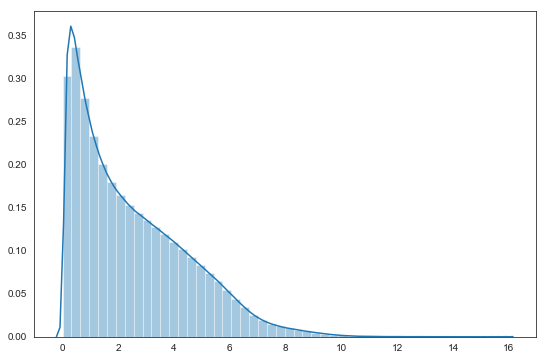

In [39]:
plt.figure(figsize=(9,6))
_=sns.distplot(vals[vals>0])
plt.savefig("Figures"+os.sep+"tirosh_exp_hist.png")

Note: We'll cover plots later. For now, take this code for granted. 

Now we need to normalize each expression value to the 0-1 interval.

We need the minimum and maximum expression values. 

In [40]:
min_val = np.min(vals)
max_val = np.max(vals)
print('Min: {0:.2f}, Max: {1:.2f}'.format(min_val,max_val))

Min: 0.00, Max: 15.92


Now let's normalize each expression value:

In [41]:
norm_exp = (exp-min_val) / max_val
norm_exp

,Cy72_CD45_H02_S758_comb,CY58_1_CD45_B02_S974_comb,Cy71_CD45_D08_S524_comb,Cy81_FNA_CD45_B01_S301_comb,Cy80_II_CD45_B07_S883_comb,Cy81_Bulk_CD45_B10_S118_comb,Cy72_CD45_D09_S717_comb,Cy74_CD45_A03_S387_comb,Cy71_CD45_B05_S497_comb,Cy80_II_CD45_C09_S897_comb,...,CY75_1_CD45_CD8_7__S265_comb,CY75_1_CD45_CD8_3__S127_comb,CY75_1_CD45_CD8_1__S61_comb,CY75_1_CD45_CD8_1__S12_comb,CY75_1_CD45_CD8_1__S25_comb,CY75_1_CD45_CD8_7__S223_comb,CY75_1_CD45_CD8_1__S65_comb,CY75_1_CD45_CD8_1__S93_comb,CY75_1_CD45_CD8_1__S76_comb,CY75_1_CD45_CD8_7__S274_comb
Cell,,,,,,,,,,,,,,,,,,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPS11,0.578861,0.525937,0.584877,0.495359,0.523086,0.491968,0.525887,0.510821,0.529881,0.477096,...,0.000000,0.493871,0.367424,0.039339,0.393984,0.344715,0.309376,0.445632,0.251021,0.250562
ELMO2,0.000000,0.000000,0.133536,0.000000,0.000000,0.048609,0.000000,0.000000,0.000000,0.024049,...,0.000000,0.000000,0.198279,0.301024,0.000000,0.000000,0.347271,0.000000,0.000000,0.000000
CREB3L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157897,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MMP2,0.000000,0.000000,0.046356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180224,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TMEM216,0.000000,0.000000,0.000000,0.000000,0.238328,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.231294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018217
TRAF3IP2-AS1,0.179074,0.131778,0.038768,0.060601,0.092539,0.198329,0.082145,0.086680,0.000000,0.070734,...,0.235791,0.109722,0.112272,0.086918,0.084212,0.151052,0.106688,0.097902,0.029596,0.105169
LRRC37A5P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
print('Normalized min: {0:.1f}, max: {1:.1f}'.format(np.min(norm_exp.values), np.amax(norm_exp.values)))

Normalized min: 0.0, max: 1.0


Can we do this in one-line?

In [43]:
norm_exp2 = (exp - exp.values.flatten().min()) / exp.values.flatten().max()

Is the output equivalent to the other method?

In [44]:
np.all(norm_exp == norm_exp2)

True

Yes, these are equivalent.

### What would the distribution be?

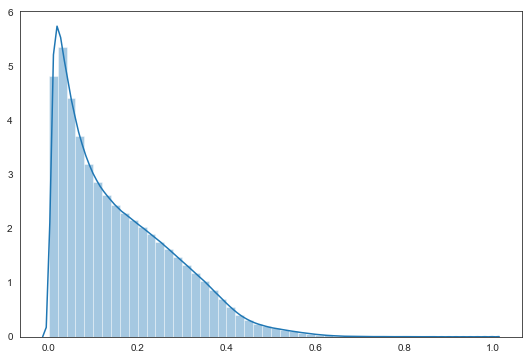

In [45]:
norm_vals = norm_exp.values.flatten()
plt.figure(figsize=(9,6))
_=sns.distplot(norm_vals[norm_vals>0])
plt.savefig("Figures"+os.sep+"tirosh_normexp_hist.png")

It's distributed identically, except now it is normalized to the 0-1 interval.

# What if we want to analyze groups of data?

### Example: calculate average expression of T-cell marker CD3D in each cell type

Our expression dataset does not have the cell type information any more. 

First, let's replace cell type indices with human readable names.

In [46]:
celltype = sc_data.iloc[2,:]
celltype[malignant==2] = 7
celltype_dict = {1:"T",2:"B",3:"Macro",4:"Endo",5:"CAF",6:"NK",7:"Mal",0:"unspec"}
celltype.rename('celltype',inplace=True)
celltype = celltype.apply(lambda x:celltype_dict[x])

Let's get a cell count using the ```value_counts()``` method of a ```Series```

In [47]:
celltype.value_counts()

T         2064
Mal       1257
B          515
unspec     506
Macro      125
Endo        65
CAF         61
NK          52
Name: celltype, dtype: int64

Now let's group...

## Grouping
Now, let's use ```groupby```

This useful functionality allows us to group elements. 

First we'll transpose the data, and then apply the grouping.

In [48]:
exp = pd.DataFrame(sc_data.iloc[3:,:], dtype=np.float)
print(exp.shape)
expT = exp.transpose()
print(expT.shape)

(23686, 4645)
(4645, 23686)


In [49]:
exp_g = expT.groupby(celltype.values)
print(type(exp_g))

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


In [50]:
exp_g.groups

{'B': Index(['Cy72_CD45_H02_S758_comb', 'Cy72_CD45_D03_S711_comb',
        'Cy72_CD45_A07_S679_comb', 'Cy74_CD45_B08_S404_comb',
        'Cy74_CD45_C03_S411_comb', 'Cy72_CD45_A05_S677_comb',
        'Cy74_CD45_D08_S428_comb', 'Cy72_CD45_B09_S693_comb',
        'Cy81_FNA_CD45_H05_S281_comb', 'Cy72_CD45_F10_S742_comb',
        ...
        'CY94CD45POS_1_E08_S152_comb', 'CY94CD45POS_1_G12_S180_comb',
        'CY88CD45POS_7_G03_S267_comb', 'CY94CD45POS_1_H03_S183_comb',
        'CY88CD45POS_7_C05_S221_comb', 'CY94CD45POS_1_D03_S135_comb',
        'CY94_CD45NEG_CD90POS_2_B04_S16_comb',
        'CY94_CD45NEG_CD90POS_2_F09_S69_comb',
        'CY94_CD45NEG_CD90POS_2_B11_S23_comb',
        'CY94_CD45NEG_CD90POS_2_F04_S64_comb'],
       dtype='object', length=515),
 'CAF': Index(['Cy80_II_CD45_G05_S941_comb', 'Cy80_II_CD45_H03_S951_comb',
        'cy80-CD45-neg-D12-S912-comb', 'cy82-CD45-pos-1-C12-S516-comb',
        'cy82-CD45-pos-1-D06-S522-comb', 'cy82-CD45-pos-3-D04-S40-comb',
        'cy82-

What do we do with this?

## Handling groups
The most straightforward way is to get a group and work with it.

In [51]:
t_cells = exp_g.get_group('T')
print(t_cells.shape)

(2064, 23686)


That's the right size.

In [52]:
print('Average CD3D expression in T cells: {0:.2f}'.format(t_cells['CD3D'].mean()))

Average CD3D expression in T cells: 6.51


A straightforward extension of this to calculating per-group average is:

In [53]:
for g_ind in exp_g.groups.keys():
    group = exp_g.get_group(g_ind)
    print('Average CD3D expression in {2:s} cells is {0:.2f} (n={1:d} cells)'.format(
        group['CD3D'].mean(), group.shape[0], g_ind))

Average CD3D expression in B cells is 0.07 (n=515 cells)
Average CD3D expression in CAF cells is 0.07 (n=61 cells)
Average CD3D expression in Endo cells is 0.00 (n=65 cells)
Average CD3D expression in Macro cells is 0.08 (n=125 cells)
Average CD3D expression in Mal cells is 0.10 (n=1257 cells)
Average CD3D expression in NK cells is 0.15 (n=52 cells)
Average CD3D expression in T cells is 6.51 (n=2064 cells)
Average CD3D expression in unspec cells is 1.45 (n=506 cells)


A more elegant way to achieve this:

In [54]:
exp_g.aggregate({'CD3D': ['count', 'mean', 'min', 'max']})

CD3D                        
       count      mean  min      max
B        515  0.072389  0.0   6.5381
CAF       61  0.072125  0.0   3.7842
Endo      65  0.000000  0.0   0.0000
Macro    125  0.080136  0.0   3.9692
Mal     1257  0.101038  0.0   7.8954
NK        52  0.152696  0.0   7.2221
T       2064  6.513088  0.0  10.1230
unspec   506  1.446838  0.0  10.0610

What if we wanted to see a few different marker genes?

Here's a rough (and inaccurate) guideline:
* **CD14**: macrophages
* **CD20**: B cells (aka **MS4A1**)
* **CD56**: NK

In [55]:
exp_g.aggregate({
    'CD3D': ['count', 'mean', 'min', 'max'],
    'CD14': ['mean', 'min', 'max'],
    'MS4A1': ['mean', 'min', 'max'],
    'NCAM1': ['mean', 'min', 'max'],})

CD3D                              CD14                   MS4A1       \
       count      mean  min      max      mean  min      max      mean  min   
B        515  0.072389  0.0   6.5381  0.010099  0.0   3.1032  6.475399  0.0   
CAF       61  0.072125  0.0   3.7842  0.351683  0.0   4.4998  0.194591  0.0   
Endo      65  0.000000  0.0   0.0000  0.662045  0.0   5.7231  0.067491  0.0   
Macro    125  0.080136  0.0   3.9692  7.191868  0.0  10.6250  0.001027  0.0   
Mal     1257  0.101038  0.0   7.8954  0.118596  0.0   9.6615  0.034413  0.0   
NK        52  0.152696  0.0   7.2221  0.093625  0.0   4.8685  0.344963  0.0   
T       2064  6.513088  0.0  10.1230  0.055831  0.0   8.7551  0.250117  0.0   
unspec   506  1.446838  0.0  10.0610  0.427557  0.0   8.2257  1.752007  0.0   

                    NCAM1                 
            max      mean  min       max  
B       9.28330  0.022270  0.0  3.884400  
CAF     6.44500  0.142036  0.0  4.739900  
Endo    3.88920  0.455900  0.0  3.343300  
Macro   0.10836  0.000442  0.0  0.055196  
Mal     4.91650  0.265723  0.0  3.937100  
NK      7.83110  2.333908  0.0  5.722400  
T       7.58650  0.030788  0.0  5.229600  
unspec  8.49240  0.186851  0.0  5.480200

What if we wanted to do something more complicated?

For example, all these marker genes have zero expression at minimum in their respective cell populations. 

How many cells actually have zero expression of their markers?

In [56]:
f = lambda x: sum(x==0)

In [57]:
exp_g.aggregate({
    'CD3D': ['count',f],
    'CD14': f,
    'MS4A1': f,
    'NCAM1': f,})

CD3D              CD14    MS4A1    NCAM1
       count <lambda> <lambda> <lambda> <lambda>
B        515    499.0    512.0     16.0    505.0
CAF       61     59.0     54.0     57.0     58.0
Endo      65     65.0     54.0     63.0     49.0
Macro    125    119.0      4.0    123.0    124.0
Mal     1257   1220.0   1206.0   1225.0   1062.0
NK        52     50.0     51.0     48.0     20.0
T       2064    181.0   2024.0   1892.0   2008.0
unspec   506    373.0    453.0    338.0    455.0

# Output

Finally, let's see how we can write Pandas data frames to files.

For example, let's write the CD3D expression of T cells into an Excel file called ```T-cells.xlsx``` in the appropriate format.

Any ideas?

In [60]:
t_cells['CD3D'].to_excel('T-cells.xlsx')

In [61]:
!open T-cells.xlsx